In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

from matplotlib.colors import LogNorm

from s1_inverse import *


In [2]:

####################################################################################################
####################################################################################################

#file_all = "../pax_waveform_simulator/merged/merged_all_v180220.pkl"
file_all = "../pax_waveform_simulator/merged/merged_all_v180222.pkl"

df_all   = pd.read_pickle(file_all)
df_s1s2   = df_all[df_all['interactions'] == 1].reset_index(drop=True)


In [3]:

####################################################################################################
####################################################################################################

nEventsTotal = df_all.shape[0]
nEventsS1S2  = df_s1s2.shape[0]

print()
print("Total Events:   " + str(nEventsTotal))
print("S1 & S2 Events: " + str(nEventsS1S2))
display(df_s1s2[:][0:5])
print()



Total Events:   2000
S1 & S2 Events: 1205


,instruction,recoil_type,x,y,depth,s1_photons,s2_electrons,t,event_number,interactions,...,intr_x,intr_y,intr_z,intr_drift_time,intr_corrected_s1_area,intr_corrected_s2_area,s2_x,s2_y,reco_s1_photons,reco_s2_electrons
0,1,ER,2.626434,-17.960824,57.456815,164,79,650000.0,1,1,...,1.620927,-16.084586,-57.42432,400480.0,19.640461,1801.900436,1.510358,-16.041489,0.0,84.596265
1,3,ER,10.907536,-6.312277,57.780505,212,75,650000.0,3,1,...,10.099624,-5.860276,-57.74544,402710.0,21.262899,1647.320092,9.854519,-5.384119,0.0,77.338971
2,6,ER,2.726006,37.749081,64.494053,265,70,650000.0,6,1,...,2.369048,34.787594,-64.49760,449600.0,31.001638,1626.710100,2.550974,35.246076,0.0,76.371366
3,13,ER,-0.304233,32.576034,75.126820,34,43,650000.0,13,1,...,0.872807,28.303885,-75.77856,527940.0,5.522334,1070.972235,0.934599,28.680316,0.0,50.280387
4,14,ER,36.200947,-5.005732,48.913918,136,91,650000.0,14,1,...,33.291353,-4.613409,-49.01040,342050.0,6.642573,2157.229385,33.382222,-4.935027,0.0,101.278375


In [5]:

####################################################################################################
####################################################################################################

arr_s1_true = df_s1s2[:]['s1_photons'].as_matrix()
arr_s1_reco = np.zeros(nEventsS1S2)                # df_s1s2[:]['reco_s2_electrons'].as_matrix()

arr_s1_area      = df_s1s2[:]['intr_corrected_s1_area'].as_matrix()
arr_s1_area_test = len(getS1AreaCorrected())

print(arr_s1_area_test)

10


In [5]:

####################################################################################################
####################################################################################################

s1_max_true = np.amax(arr_s1_true)
s1_max_reco = np.amax(arr_s1_reco)

s1_max_area = np.amax(arr_s1_area)

s1_true_mean = np.mean(arr_s1_true)
s1_reco_mean = np.mean(arr_s1_reco)
s1_true_std  = np.std (arr_s1_true)
s1_reco_std  = np.std (arr_s1_reco)

s1_label_true = 'true (std: %.01f, mean: %.01f)'% (s1_true_std, s1_true_mean)
s1_label_reco = 'reco (std: %.01f, mean: %.01f)'% (s1_reco_std, s1_reco_mean)

s1_area_label_reco      = 'reco' # (std: %.01f, mean: %.01f)'% (s1_reco_std, s1_reco_mean)
s1_area_label_reco_test = 'test' # (std: %.01f, mean: %.01f)'% (s1_reco_std, s1_reco_mean)

print()
print("S1 True Max: " + str(s1_max_true))
print("S1 Reco Max: " + str(s1_max_reco))
print()

s1_max     = 750
s1_nbins   = 750/10

s1_area_max     = 100
s1_area_nbins   = 100/2


eps       = 1


S1 True Max: 831
S1 Reco Max: 0.0



In [6]:

####################################################################################################
####################################################################################################

arr_s1_true_ovflw = arr_s1_true.copy()
arr_s1_reco_ovflw = arr_s1_reco.copy()

arr_s1_area_ovflw      = arr_s1_area.copy()
arr_s1_area_test_ovflw = arr_s1_area_test.copy()

arr_s1_true_ovflw[arr_s1_true_ovflw > s1_max] = s1_max - eps
arr_s1_reco_ovflw[arr_s1_reco_ovflw > s1_max] = s1_max - eps

arr_s1_area_ovflw     [arr_s1_area_ovflw      > s1_area_max] = s1_area_max - eps
arr_s1_area_test_ovflw[arr_s1_area_test_ovflw > s1_area_max] = s1_area_max - eps



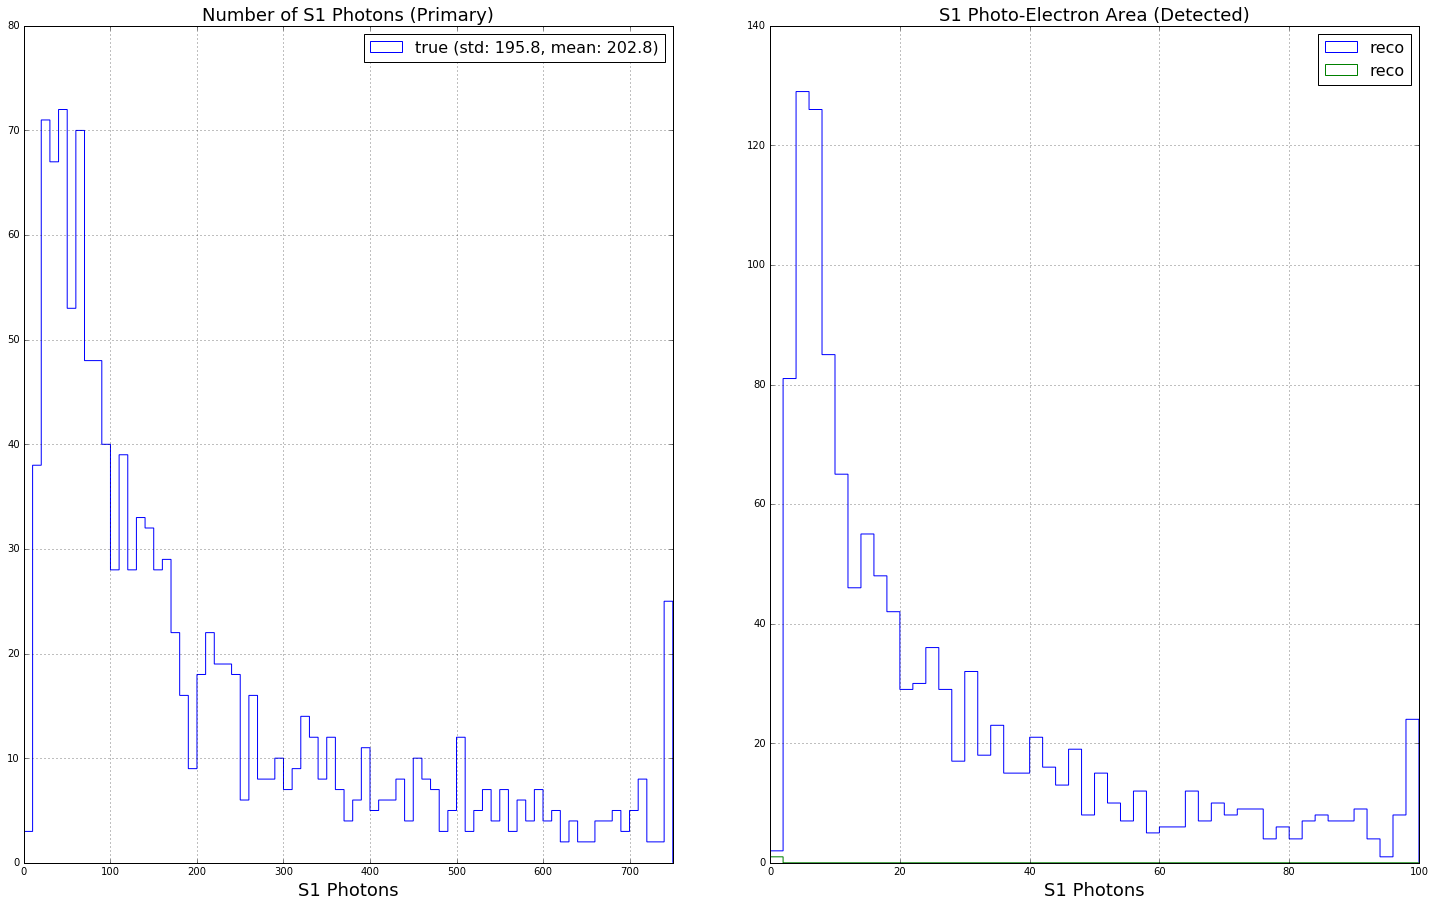

In [7]:

####################################################################################################
####################################################################################################

rows = 1
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 1)

plt.hist(
    arr_s1_true_ovflw,
    bins=s1_nbins,
    range=[0, s1_max],
    label=s1_label_true,
    fill=False,
    histtype='step'
)

plt.xlim([0, s1_max])
plt.title('Number of S1 Photons (Primary)', fontsize=18)
plt.xlabel('S1 Photons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 2)

plt.hist(arr_s1_area_ovflw     , bins=s1_area_nbins, range=[0, s1_area_max], label=s1_area_label_reco, histtype='step')
plt.hist(arr_s1_area_test_ovflw, bins=s1_area_nbins, range=[0, s1_area_max], label=s1_area_label_reco, histtype='step')

plt.xlim([0, s1_area_max])
plt.title('S1 Photo-Electron Area (Detected)', fontsize=18)
plt.xlabel('S1 Photons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.close()
print()
display(fig)
print()
